### Predict if a customer subscribes to a term deposits or not, when contacted by a marketing agent, by understanding the different features and performing predictive analytics

In [154]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
data=pd.read_csv("bank-additional-full.csv",sep=";")

In [156]:
df=pd.DataFrame(data)

In [157]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [226]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [159]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [194]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [228]:
job=df.job.value_counts().index
job_count=df.job.value_counts().values

In [1]:
# plt.figure(figsize=(20,10))
# plt.pie(job_count, labels=job,autopct='%1.1f%%')

E:\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

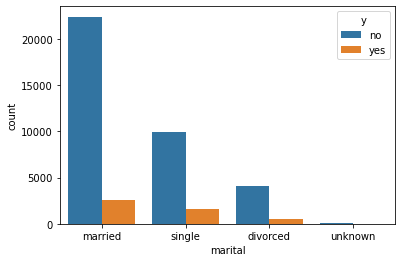

In [196]:
sns.countplot(df['marital'],hue=df['y'])

<AxesSubplot:xlabel='age', ylabel='y'>

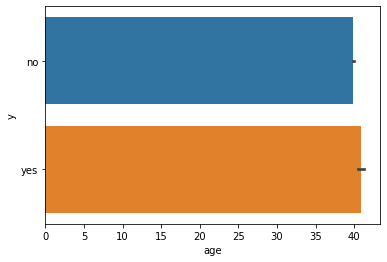

In [221]:
sns.barplot(x=df['age'],y=df['y'],orient="h")

<AxesSubplot:xlabel='age', ylabel='Density'>

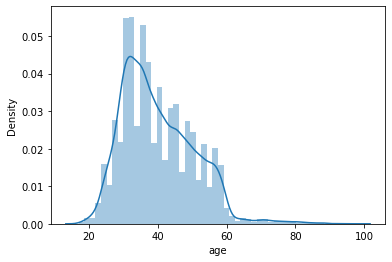

In [214]:
sns.distplot(df['age'])

In [162]:
for i in df.columns:
    if (df[i].dtype=='O'):
        print(i,":",df[i].nunique(),"==>",df[i].unique(),"\n")

job : 12 ==> ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital : 4 ==> ['married' 'single' 'divorced' 'unknown'] 

education : 8 ==> ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default : 3 ==> ['no' 'unknown' 'yes'] 

housing : 3 ==> ['no' 'yes' 'unknown'] 

loan : 3 ==> ['no' 'yes' 'unknown'] 

contact : 2 ==> ['telephone' 'cellular'] 

month : 10 ==> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week : 5 ==> ['mon' 'tue' 'wed' 'thu' 'fri'] 

poutcome : 3 ==> ['nonexistent' 'failure' 'success'] 

y : 2 ==> ['no' 'yes'] 



In [163]:
a=pd.get_dummies(df[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']],drop_first=True)

In [164]:
a

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [165]:
final_df=pd.concat([df,a],axis=1)

In [166]:
final_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0


In [167]:
final_df=final_df.drop(df[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']],axis=1)

In [168]:
final_df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0


In [169]:
final_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutc

# Model

In [170]:
x = final_df.drop('y', axis = 1)
y = final_df.y

In [171]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [183]:
from sklearn import svm

In [184]:
svm=svm.SVC(C=2,gamma=0.045,kernel='linear')

In [185]:
svm.fit(X_train , y_train)
predict=svm.predict(X_test)

In [186]:
svm.score(X_train ,y_train )

0.890257966616085

In [187]:
svm.score(X_test,y_test)

0.8996115562029618

In [ ]:
from sklearn import svm as svm
sv=svm.SVC()
from sklearn.model_selection import GridSearchCV
 
para_grid = {'C': [1, 2, 3, 4, 5],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .......................C=1, gamma=1, kernel=rbf; total time= 4.0min
[CV 2/5] END .......................C=1, gamma=1, kernel=rbf; total time= 4.1min
[CV 3/5] END .......................C=1, gamma=1, kernel=rbf; total time= 3.9min
[CV 4/5] END .......................C=1, gamma=1, kernel=rbf; total time= 4.1min
[CV 5/5] END .......................C=1, gamma=1, kernel=rbf; total time= 4.0min
[CV 1/5] END ....................C=1, gamma=1, kernel=linear; total time= 1.1min
[CV 2/5] END ....................C=1, gamma=1, kernel=linear; total time=  53.1s
[CV 3/5] END ....................C=1, gamma=1, kernel=linear; total time=  57.1s
[CV 4/5] END ....................C=1, gamma=1, kernel=linear; total time= 1.1min
[CV 5/5] END ....................C=1, gamma=1, kernel=linear; total time= 1.4min
